In [1]:
from itertools import cycle
from math import pi
from Simulation import *
from Geometry import *

In [2]:
mesh = Nanosphere(40,0)
sim = Simulation(mesh)

In [3]:
%%time
sim.RefineMesh(400,700,tol=1000,percentage=.7)

NameError: name 'mt_mid' is not defined

In [16]:
%%time
wavelength_list = np.linspace(400,700,40)
ext_list = np.array([(wavelength,sim.Extinction(wavelength)) for wavelength in wavelength_list])

Wavelength:  400.0
Wavelength:  407.6923076923077
Wavelength:  415.38461538461536
Wavelength:  423.0769230769231
Wavelength:  430.7692307692308
Wavelength:  438.46153846153845
Wavelength:  446.15384615384613
Wavelength:  453.84615384615387
Wavelength:  461.53846153846155
Wavelength:  469.2307692307692
Wavelength:  476.9230769230769
Wavelength:  484.61538461538464
Wavelength:  492.3076923076923
Wavelength:  500.0
Wavelength:  507.6923076923077
Wavelength:  515.3846153846154
Wavelength:  523.0769230769231
Wavelength:  530.7692307692307
Wavelength:  538.4615384615385
Wavelength:  546.1538461538462
Wavelength:  553.8461538461538
Wavelength:  561.5384615384615
Wavelength:  569.2307692307693
Wavelength:  576.9230769230769
Wavelength:  584.6153846153846
Wavelength:  592.3076923076924
Wavelength:  600.0
Wavelength:  607.6923076923077
Wavelength:  615.3846153846154
Wavelength:  623.0769230769231
Wavelength:  630.7692307692307
Wavelength:  638.4615384615385
Wavelength:  646.1538461538462
Wavelen

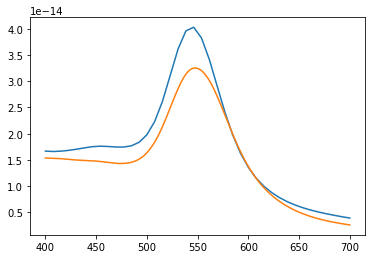

In [20]:
plt.plot(ext_list[:,0],-ext_list[:,1])
plt.plot(mie_list[:,0]*1e+9,mie_list[:,1])

In [18]:
mie_list = np.array([[4.e-7, 1.536244381584591e-14], [4.02e-7, 1.5349080912567224e-14], \
[4.04e-7, 1.5336233877587345e-14], [4.06e-7, 1.5323115067359273e-14], \
[4.08e-7, 1.5308892690857472e-14], [4.1e-7, 1.5292690231549778e-14], \
[4.12e-7, 1.5273587523119685e-14], [4.14e-7, 1.5250624409621957e-14], \
[4.16e-7, 1.5223268823016963e-14], [4.18e-7, 1.5192222426382478e-14], \
[4.2e-7, 1.515843290030259e-14], [4.22e-7, 1.512289159204649e-14], \
[4.24e-7, 1.5086630311876648e-14], [4.26e-7, 1.505071982335371e-14], \
[4.28e-7, 1.5016270122197582e-14], [4.3e-7, 1.498443259748334e-14], \
[4.32e-7, 1.4956399774602637e-14], [4.34e-7, 1.493273677525381e-14], \
[4.36e-7, 1.491261596395607e-14], [4.38e-7, 1.4894988937477514e-14], \
[4.4e-7, 1.4878749333391942e-14], [4.42e-7, 1.4862728402350506e-14], \
[4.44e-7, 1.4845692992991586e-14], [4.46e-7, 1.4826346173035226e-14], \
[4.48e-7, 1.4803330726782652e-14], [4.5e-7, 1.4775235764564747e-14], \
[4.52e-7, 1.474068516380883e-14], [4.54e-7, 1.4699809122311554e-14], \
[4.56e-7, 1.4654161474836897e-14], [4.58e-7, 1.460539967205369e-14], \
[4.6e-7, 1.4555224673834378e-14], [4.62e-7, 1.4505374144168706e-14], \
[4.64e-7, 1.4457619499629004e-14], [4.66e-7, 1.4413766940798235e-14], \
[4.68e-7, 1.4375662578644673e-14], [4.7e-7, 1.4345201781133034e-14], \
[4.72e-7, 1.4324342910909924e-14], [4.74e-7, 1.431510728088578e-14], \
[4.76e-7, 1.431937794933072e-14], [4.78e-7, 1.433900288655366e-14], \
[4.8e-7, 1.437599846943771e-14], [4.82e-7, 1.4432591212741538e-14], \
[4.84e-7, 1.451126240187021e-14], [4.86e-7, 1.461480143813172e-14], \
[4.88e-7, 1.474637054657112e-14], [4.9e-7, 1.490958415052467e-14], \
[4.92e-7, 1.510860704069668e-14], [4.94e-7, 1.5348276487754878e-14], \
[4.96e-7, 1.5634254686178986e-14], [4.98e-7, 1.5972312801687544e-14], \
[5.e-7, 1.6364892237110004e-14], [5.02e-7, 1.6813507775936356e-14], \
[5.04e-7, 1.7319769866931862e-14], [5.06e-7, 1.7885230812561938e-14], \
[5.08e-7, 1.8511171434848368e-14], [5.1e-7, 1.9198311495459352e-14], \
[5.12e-7, 1.9946425152639056e-14], [5.14e-7, 2.075384116476881e-14], \
[5.16e-7, 2.161680731023843e-14], [5.18e-7, 2.2528703229539912e-14], \
[5.2e-7, 2.347910419095822e-14], [5.22e-7, 2.4452745728557967e-14], \
[5.24e-7, 2.543165458570046e-14], [5.26e-7, 2.640276070811287e-14], \
[5.28e-7, 2.7352554247061708e-14], [5.3e-7, 2.826583665206733e-14], \
[5.32e-7, 2.912633014658638e-14], [5.34e-7, 2.9917539663665185e-14], \
[5.36e-7, 3.062378687494563e-14], [5.38e-7, 3.123129059213905e-14], \
[5.4e-7, 3.17291462421279e-14], [5.42e-7, 3.211006582801294e-14], \
[5.44e-7, 3.23707773571977e-14], [5.46e-7, 3.251203982248659e-14], \
[5.48e-7, 3.253829195502938e-14], [5.5e-7, 3.245700513536572e-14], \
[5.52e-7, 3.2277132882929483e-14], [5.54e-7, 3.200241114334954e-14], \
[5.56e-7, 3.163424071130769e-14], [5.58e-7, 3.117536830846589e-14], \
[5.6e-7, 3.0629941792275274e-14], [5.62e-7, 3.000347014251318e-14], \
[5.64e-7, 2.9302723599724575e-14], [5.66e-7, 2.8535577011101935e-14], \
[5.68e-7, 2.771080415091559e-14], [5.7e-7, 2.6837834824915687e-14], \
[5.72e-7, 2.592648942483168e-14], [5.74e-7, 2.4986706931735605e-14], \
[5.76e-7, 2.4028282072824445e-14], [5.78e-7, 2.306062555536489e-14], \
[5.8e-7, 2.2092558375047866e-14], [5.82e-7, 2.113214758742411e-14], \
[5.84e-7, 2.0186681692288782e-14], [5.86e-7, 1.9263179953541025e-14], \
[5.88e-7, 1.8367569705081527e-14], [5.9e-7, 1.7504269036720238e-14], \
[5.92e-7, 1.6676356847489967e-14], [5.94e-7, 1.5885763069762837e-14], \
[5.96e-7, 1.5133459377000056e-14], [5.98e-7, 1.4419639732921442e-14], \
[6.e-7, 1.3743884228254132e-14], [6.02e-7, 1.3105302866558995e-14], \
[6.04e-7, 1.2502658309444519e-14], [6.06e-7, 1.1934468180097545e-14], \
[6.08e-7, 1.1399088500364715e-14], [6.1e-7, 1.0894780352602879e-14], \
[6.12e-7, 1.0419762048835381e-14], [6.14e-7, 9.972249067104031e-15], \
[6.16e-7, 9.550483862796524e-15], [6.18e-7, 9.152757442065479e-15], \
[6.2e-7, 8.777424387363125e-15], [6.22e-7, 8.422923038803662e-15], \
[6.24e-7, 8.087815834287494e-15], [6.26e-7, 7.770792436031218e-15], \
[6.28e-7, 7.47065701298018e-15], [6.3e-7, 7.186316790802646e-15], \
[6.32e-7, 6.916771795684303e-15], [6.34e-7, 6.66110567155275e-15], \
[6.36e-7, 6.418477459434087e-15], [6.38e-7, 6.188114237218301e-15], \
[6.4e-7, 5.969304527648572e-15], [6.42e-7, 5.761392391517467e-15], \
[6.44e-7, 5.563772131657941e-15], [6.46e-7, 5.375883541261202e-15], \
[6.48e-7, 5.197207637300241e-15], [6.5e-7, 5.027262826391381e-15], \
[6.52e-7, 4.865601456313559e-15], [6.54e-7, 4.711806711668257e-15], \
[6.56e-7, 4.56548981685232e-15], [6.58e-7, 4.4262875136806665e-15], \
[6.6e-7, 4.293859784689195e-15], [6.62e-7, 4.167877595135043e-15], \
[6.64e-7, 4.047971928205512e-15], [6.66e-7, 3.933773525873286e-15], \
[6.68e-7, 3.8249346856195386e-15], [6.7e-7, 3.721128303976663e-15], \
[6.72e-7, 3.622046869300248e-15], [6.74e-7, 3.527401454196945e-15], \
[6.76e-7, 3.4369207196983626e-15], [6.78e-7, 3.3503499404215903e-15], \
[6.8e-7, 3.2674500576226066e-15], [6.82e-7, 3.187996765147387e-15], \
[6.84e-7, 3.1117796317474274e-15], [6.86e-7, 3.038601261990386e-15], \
[6.88e-7, 2.968276497012319e-15], [6.9e-7, 2.900631655581489e-15], \
[6.92e-7, 2.8355038153375525e-15], [6.94e-7, 2.772740133605372e-15], \
[6.96e-7, 2.712197206831137e-15], [6.98e-7, 2.653740467430737e-15], \
[7.e-7, 2.597243616657233e-15]])